In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_gen = pd.read_csv('data/EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena', sep='\t')
df_meta = pd.read_csv('data/Survival_SupplementalTable_S1_20171025_xena_sp', sep='\t')

In [12]:
df_gen.head()

,sample,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,...,TCGA-CG-4449-01,TCGA-CG-4462-01,TCGA-CG-4465-01,TCGA-CG-4466-01,TCGA-CG-4469-01,TCGA-CG-4472-01,TCGA-CG-4474-01,TCGA-CG-4475-01,TCGA-CG-4476-01,TCGA-CG-4477-01
0,100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100133144,2.09,1.88,1.45,0.00,0.00,1.12,1.29,0.00,2.45,...,2.42,2.74,2.64,3.99,4.40,3.00,4.27,3.71,4.29,4.24
2,100134869,2.30,3.32,2.92,1.35,2.45,2.82,1.72,1.24,2.60,...,1.87,2.12,1.78,2.60,3.66,3.87,3.07,3.65,3.64,3.99
3,10357,7.23,6.36,6.45,5.78,6.09,6.71,6.58,6.31,6.13,...,9.31,8.20,9.43,9.14,10.02,9.32,9.54,8.99,9.48,9.46
4,10431,10.99,10.35,10.04,11.20,10.30,10.87,9.96,10.78,10.25,...,10.23,9.33,10.21,9.38,9.34,10.34,10.17,10.43,9.93,10.76


In [5]:
pd.set_option('display.max_columns', None)
df_meta.head()

,sample,_PATIENT,cancer type abbreviation,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,initial_pathologic_dx_year,menopause_status,birth_days_to,vital_status,tumor_status,last_contact_days_to,death_days_to,cause_of_death,new_tumor_event_type,new_tumor_event_site,new_tumor_event_site_other,new_tumor_event_dx_days_to,treatment_outcome_first_course,margin_status,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,TCGA-OR-A5J1-01,TCGA-OR-A5J1,ACC,58.0,MALE,WHITE,Stage II,NaN,Adrenocortical carcinoma- Usual Type,NaN,2000.0,NaN,-21496.0,Dead,WITH TUMOR,NaN,1355.0,NaN,Distant Metastasis,Peritoneal Surfaces,NaN,754.0,Complete Remission/Response,NaN,NaN,1.0,1355.0,1.0,1355.0,1.0,754.0,1.0,754.0,NaN
1,TCGA-OR-A5J2-01,TCGA-OR-A5J2,ACC,44.0,FEMALE,WHITE,Stage IV,NaN,Adrenocortical carcinoma- Usual Type,NaN,2004.0,NaN,-16090.0,Dead,WITH TUMOR,NaN,1677.0,NaN,Distant Metastasis,Soft Tissue,NaN,289.0,Progressive Disease,NaN,NaN,1.0,1677.0,1.0,1677.0,NaN,NaN,1.0,289.0,NaN
2,TCGA-OR-A5J3-01,TCGA-OR-A5J3,ACC,23.0,FEMALE,WHITE,Stage III,NaN,Adrenocortical carcinoma- Usual Type,NaN,2008.0,NaN,-8624.0,Alive,WITH TUMOR,2091.0,NaN,NaN,Distant Metastasis,Lung,NaN,53.0,Complete Remission/Response,NaN,NaN,0.0,2091.0,0.0,2091.0,1.0,53.0,1.0,53.0,NaN
3,TCGA-OR-A5J4-01,TCGA-OR-A5J4,ACC,23.0,FEMALE,WHITE,Stage IV,NaN,Adrenocortical carcinoma- Usual Type,NaN,2000.0,NaN,-8451.0,Dead,WITH TUMOR,NaN,423.0,NaN,Locoregional Recurrence,Peritoneal Surfaces,NaN,126.0,Progressive Disease,NaN,NaN,1.0,423.0,1.0,423.0,NaN,NaN,1.0,126.0,NaN
4,TCGA-OR-A5J5-01,TCGA-OR-A5J5,ACC,30.0,MALE,WHITE,Stage III,NaN,Adrenocortical carcinoma- Usual Type,NaN,2000.0,NaN,-11171.0,Dead,WITH TUMOR,NaN,365.0,NaN,Locoregional Recurrence,"Other, specify",vena cava thrombus,50.0,Progressive Disease,NaN,NaN,1.0,365.0,1.0,365.0,NaN,NaN,1.0,50.0,NaN


In [14]:
# Check for overlapping Patient IDs
# In df_gen, the first column is 'sample' (gene IDs), the rest are patient IDs.
gen_patient_ids = set(df_gen.columns[1:]) 

# In df_meta, the 'sample' column contains the patient IDs.
meta_patient_ids = set(df_meta['sample'])

# Calculate intersection
common_ids = gen_patient_ids.intersection(meta_patient_ids)

print(f"Patients in Gene Data: {len(gen_patient_ids)}")
print(f"Patients in Metadata: {len(meta_patient_ids)}")
print(f"Matching Patients: {len(common_ids)}")

# Sanity Check: specific example
sample_id = 'TCGA-OR-A5J1-01'
is_in_gen = sample_id in gen_patient_ids
is_in_meta = sample_id in meta_patient_ids
print(f"\nSample {sample_id} present in both?\n {is_in_gen and is_in_meta}")

Patients in Gene Data: 11069
Patients in Metadata: 12591
Matching Patients: 11014

Sample TCGA-OR-A5J1-01 present in both?
 True


/var/folders/3b/jd8k5j055rx3c991jlh5x05h0000gn/T/ipykernel_95216/917521830.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


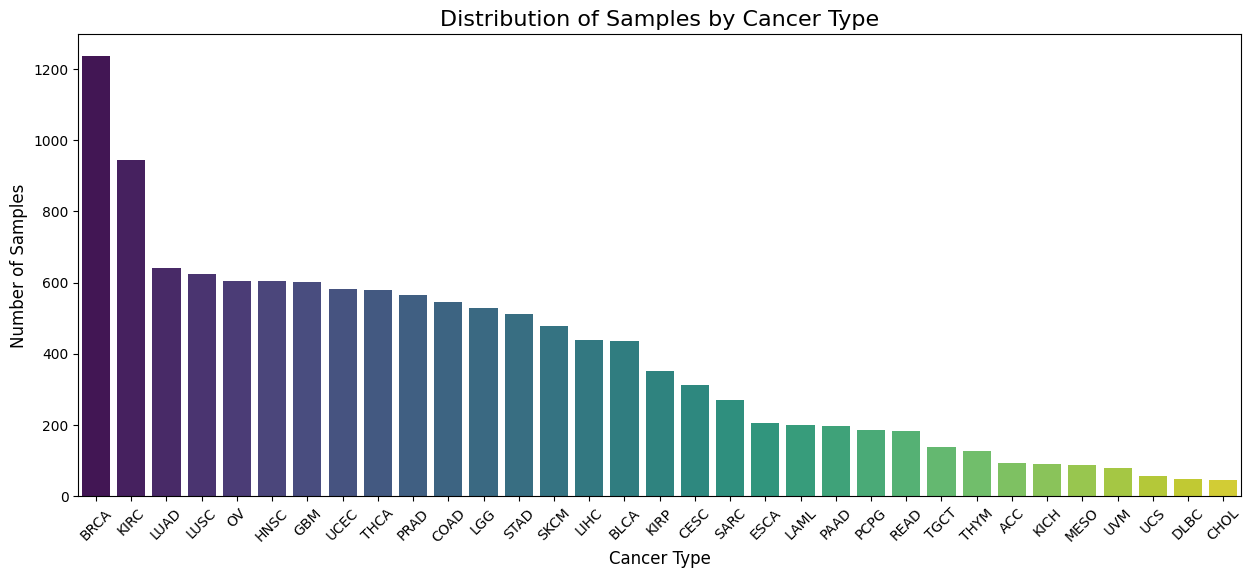

In [ ]:
# Visualize Cancer Type Distribution
plt.figure(figsize=(15, 6))
# 'cancer type abbreviation' holds the cancer labels 
ax = sns.countplot(
    data=df_meta, 
    x='cancer type abbreviation', 
    order=df_meta['cancer type abbreviation'].value_counts().index,
    palette='viridis'
)

plt.title("Distribution of Samples by Cancer Type", fontsize=16)
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)
plt.show()

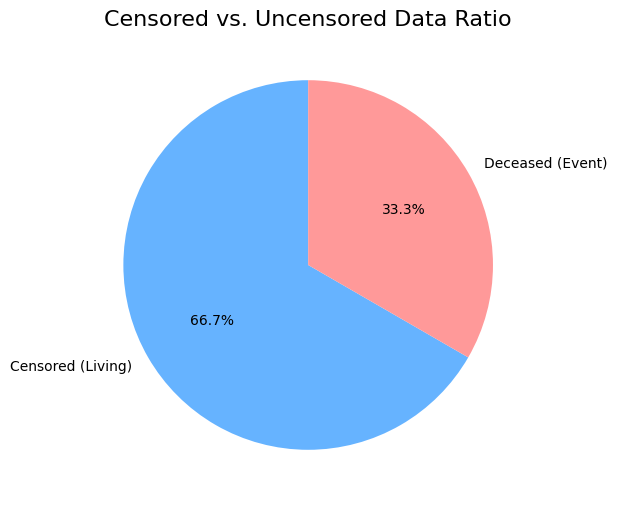

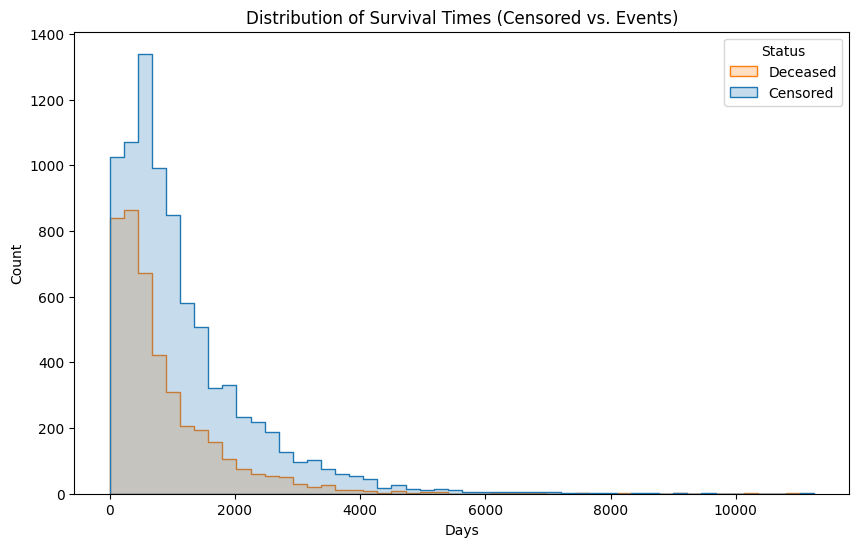

In [16]:
# Analyze Censoring (OS = Overall Survival Status)
# Calculate counts and percentages
censoring_counts = df_meta['OS'].value_counts()
censoring_labels = ['Censored (Living)', 'Deceased (Event)']

plt.figure(figsize=(8, 6))
plt.pie(
    censoring_counts, 
    labels=censoring_labels, 
    autopct='%1.1f%%', 
    colors=['#66b3ff', '#ff9999'], 
    startangle=90
)
plt.title("Censored vs. Uncensored Data Ratio", fontsize=16)
plt.show()

# View survival time distribution for both groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df_meta, x='OS.time', hue='OS', element="step", bins=50)
plt.title("Distribution of Survival Times (Censored vs. Events)")
plt.xlabel("Days")
plt.legend(title='Status', labels=['Deceased', 'Censored'])
plt.show()

/var/folders/3b/jd8k5j055rx3c991jlh5x05h0000gn/T/ipykernel_95216/3996703259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


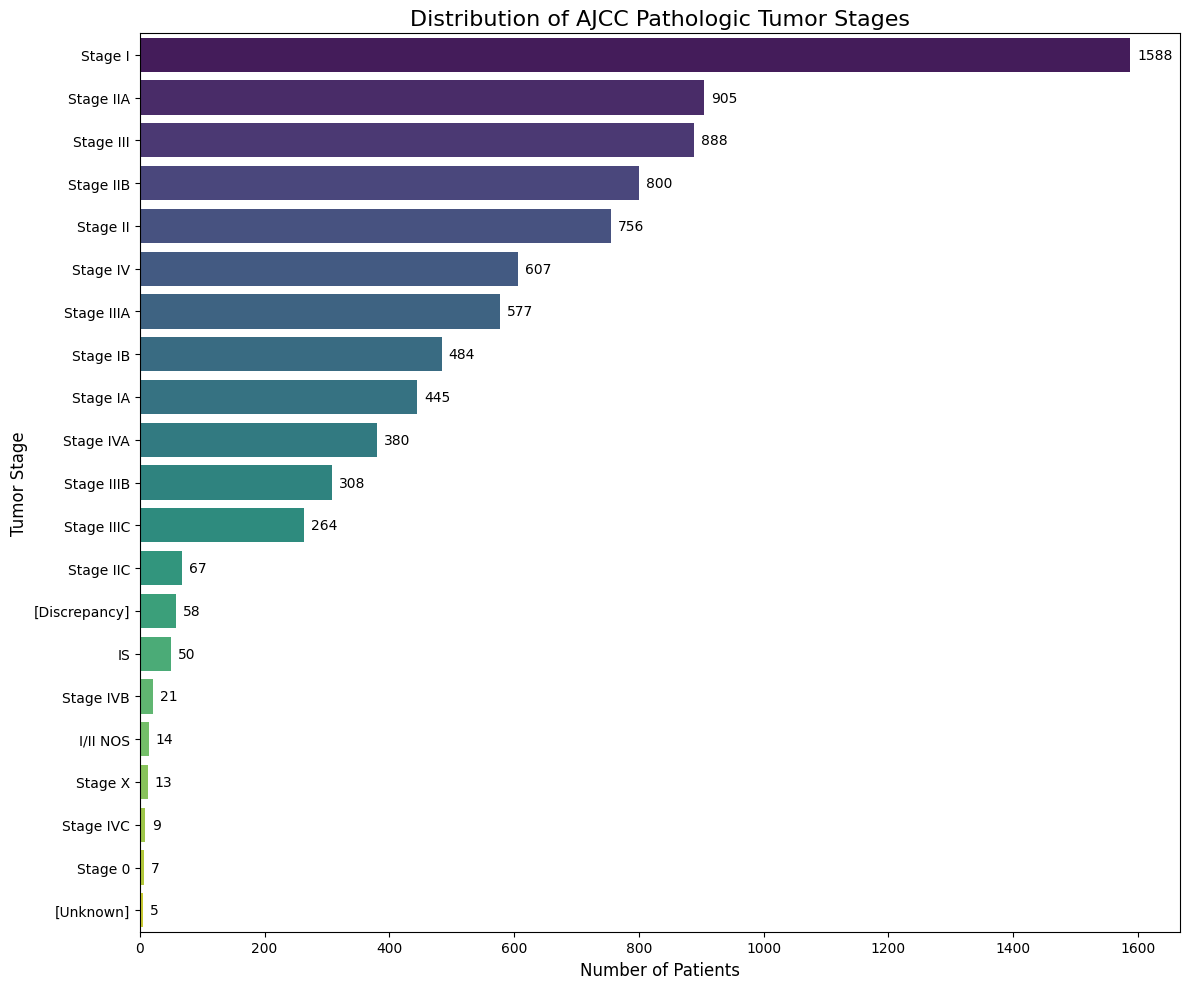

In [17]:
plt.figure(figsize=(12, 10))

# Create a Horizontal Countplot
# We order the bars by count (most frequent on top) to make it easier to read
sns.countplot(
    y='ajcc_pathologic_tumor_stage', 
    data=df_meta, 
    order=df_meta['ajcc_pathologic_tumor_stage'].value_counts().index, 
    palette='viridis'
)
plt.title('Distribution of AJCC Pathologic Tumor Stages', fontsize=16)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Tumor Stage', fontsize=12)

# Add count labels to the end of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}', 
                       (p.get_width(), p.get_y() + p.get_height() / 2.), 
                       ha='left', va='center', xytext=(5, 0), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()

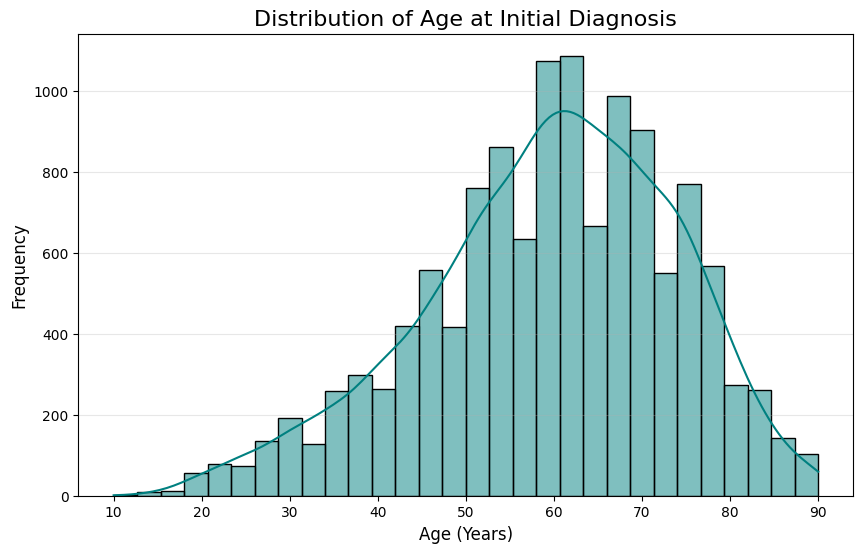

count    12540.000000
mean        59.391308
std         14.344243
min         10.000000
25%         51.000000
50%         61.000000
75%         70.000000
max         90.000000
Name: age_at_initial_pathologic_diagnosis, dtype: float64


In [18]:
# Create the figure
plt.figure(figsize=(10, 6))

# Plot Histogram with KDE
# dropna() ensures we don't plot missing values
sns.histplot(
    df_meta['age_at_initial_pathologic_diagnosis'].dropna(), 
    kde=True, 
    color='teal', 
    bins=30
)

# Add titles and labels
plt.title('Distribution of Age at Initial Diagnosis', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a grid for easier reading
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.show()

# Print basic statistics
print(df_meta['age_at_initial_pathologic_diagnosis'].describe())